In [1]:
import metnum
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from Model import Model
from Segment import Segment

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

In [3]:
#Cargamos el data frame
df_original = pd.read_csv('../data/train.csv')
df = df_original.copy()

In [4]:
#Convertimos el formato de fecha a números reales así podemos analizarlos junto a los otros features
df['fecha_unix_sec'] = pd.to_datetime(df['fecha']).astype(int)/ 10**9

# Analisis de Datos
---------------------------------------------------------------------------------------
- Queremos predecir los precios de un inmueble en funcion de las características. A priori no sabemos cuales de estas características son las más representativas, ni en el conjunto de datos, ni para cualquier vivienda en particular.
- Podemos dividir a nuestras variables en 2 tipos, de tipo **numericas** y de tipo **categoricas**
- Analicemos primero las categóricas ¿Que relación existe entre ellas? Para cuantificar esta relación, vamos a crear una matriz de correlación. Lo que nos interesa es, entre cada par de datos, medir el coeficiente de Pearson, el cual nos permite comparar un par de variables independientemente de la escala en la que cada una se encuentre. Dado que nos interesa saber si dos variables se relacionan tanto de manera positiva como negativa, vamos a tomar el cuadrado del coeficiente de Pearson (es la métrica conocida como R2 Score o coeficiente de determinación). Para visualizar de manera mas "amigable" estos datos, vamos a utilizar un mapa de calor.

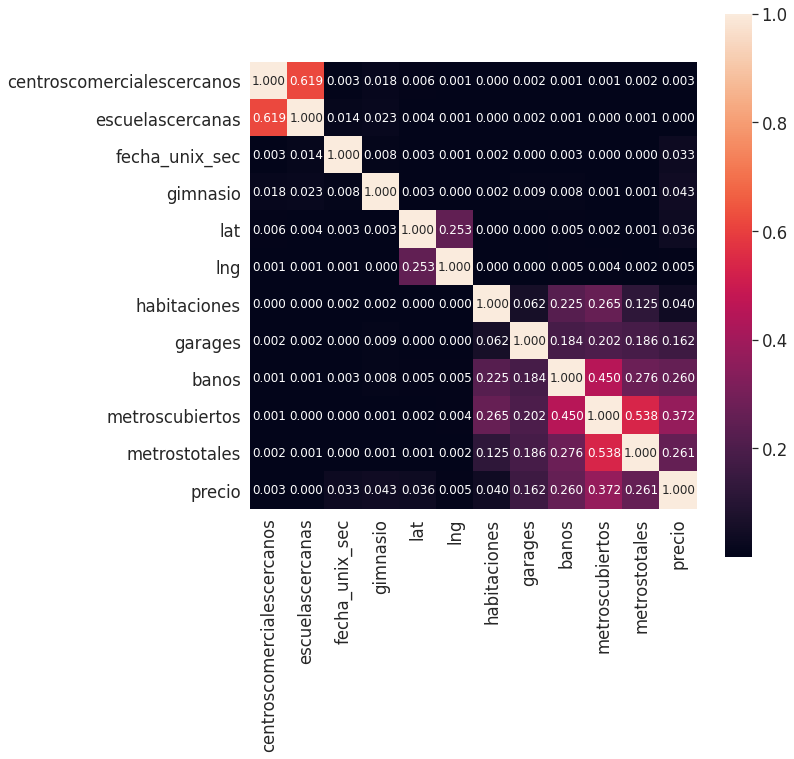

In [5]:
numeric_values = ['centroscomercialescercanos', 'escuelascercanas', 'fecha_unix_sec', 'gimnasio', 'lat', 'lng', 'habitaciones', 'garages', 'banos', 'metroscubiertos', 'metrostotales', 'precio']
cm = np.corrcoef(df[numeric_values].dropna().values.T) **2
sns.set(font_scale=1.5)
fig, ax = plt.subplots(figsize=(10,10))
hm = sns.heatmap(cm,
                cbar=True,
                annot=True,
                square=True,
                fmt='.3f',
                annot_kws={'size': 12},
                yticklabels=numeric_values,
                xticklabels=numeric_values,
                ax=ax)

---